In [1]:
import sys
sys.path.append("../util/")

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sequential_minimal_optimization(dataset, C, epsilon=0.001, epochs=100):
    bias = 0.0
    alphas = np.zeros(dataset.shape[0])
    count = 0
    numChanged = 0
    isReadyForNewLoop = True
    while ((count<epochs) and (isReadyForNewLoop or (numChanged>0))):
        numChanged = 0
        for i in range(dataset.shape[0]):
            if (isReadyForNewLoop or ((alphas[i]>0) and (alphas[i]<C))):
                Ei = np.dot(np.multiply(alphas, dataset[:, 2]), np.matmul(dataset[:, :2], dataset[i, :2]))+bias-dataset[i, 2]
                if ((dataset[i, 2]*Ei < -0.001) and (alphas[i] < C)) or \
                   ((dataset[i, 2]*Ei > 0.001) and (alphas[i] > 0)):
                    maxDeltaE = 0.0
                    j = -1
                    for _j in range(dataset.shape[0]):
                        if ((alphas[_j]>0) and (alphas[_j]<C)):
                            E = np.dot(np.multiply(alphas, dataset[:, 2]), np.matmul(dataset[:, :2], dataset[_j, :2]))+bias-dataset[_j, 2]
                            deltaE = np.fabs(Ei-E)
                            if (deltaE>maxDeltaE):
                                j = _j
                                maxDeltaE = deltaE
                                Ej = E
                    if (j<0):
                        j = i
                        while (j==i):
                            j = np.random.randint(0, dataset.shape[0])
                        Ej = np.dot(np.multiply(alphas, dataset[:, 2]), np.matmul(dataset[:, :2], dataset[j, :2]))+bias-dataset[j, 2]
                    alphaI = alphas[i].copy()
                    alphaJ = alphas[j].copy()
                    if (dataset[i, 2] != dataset[j, 2]):
                        L = max(0, alphas[j] - alphas[i])
                        H = min(C, C + alphas[j] - alphas[i])
                    else:
                        L = max(0, alphas[j] + alphas[i] - C)
                        H = min(C, alphas[j] + alphas[i])
                    if (L==H):
                        #print("L==H")
                        continue
                    eta = 2.0*np.dot(dataset[i, :2], dataset[j, :2]) \
                          -np.dot(dataset[i, :2], dataset[i, :2]) \
                          -np.dot(dataset[j, :2], dataset[j, :2])
                    if (eta>=0):
                        #print("eta>=0")
                        continue
                    alphas[j] -= dataset[j, 2]*(Ei-Ej)/eta
                    if (alphas[j]>H):
                        alphas[j] = H
                    elif (alphas[j]<L):
                        alphas[j] = L
                    if (np.fabs(alphas[j] - alphaJ) < 0.00001):
                        #print("j not moving enough")
                        continue
                    alphas[i] += dataset[j, 2]*dataset[i, 2]*(alphaJ - alphas[j])
                    bias1 = bias - Ei \
                            -dataset[i, 2]*(alphas[i]-alphaI)*np.dot(dataset[i, :2], dataset[i, :2]) \
                            -dataset[j, 2]*(alphas[j]-alphaJ)*np.dot(dataset[i, :2], dataset[j, :2])
                    bias2 = bias - Ej \
                            -dataset[i, 2]*(alphas[i]-alphaI)*np.dot(dataset[i, :2], dataset[j, :2]) \
                            -dataset[j, 2]*(alphas[j]-alphaJ)*np.dot(dataset[j, :2], dataset[j, :2])
                    if (0 < alphas[i]) and (C > alphas[i]):
                        bias = bias1
                    elif ((0 < alphas[j]) and (C > alphas[j])):
                        bias = bias2
                    else:
                        bias = (bias1 + bias2)/2.0
                numChanged += 1
        count += 1
        print(numChanged)
        if isReadyForNewLoop:
            isReadyForNewLoop = False
        elif (numChanged==0):
            isReadyForNewLoop = True
    return bias, alphas

193
8
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
-1.7342105527767357 [ -3.37724588 -21.45605192]
-4.092428068165956 [-2.3294603  -6.73450329]


d:\python37\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
d:\python37\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app


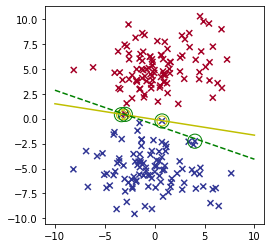

In [3]:
if __name__ == "__main__":
    from ipynb.fs.full.data_generator_2d import gaussian_2d, double_moon, visualize_data
    from ipynb.fs.full.sequential_minimal_optimization_Copy1 import sequential_minimal_optimization1
    dataset = gaussian_2d(100, [0,5], [0,-5], ((9, 0), (0, 4)), ((9, 0), (0, 4)))
    b, alphas = sequential_minimal_optimization(dataset, np.inf)
    w = np.matmul(np.multiply(alphas, dataset[:, 2]), dataset[:, :2])
    b1, alphas1 = sequential_minimal_optimization1(dataset, np.inf)
    w1 = np.matmul(np.multiply(alphas1, dataset[:, 2]), dataset[:, :2])
    print(b, w)
    print(b1, w1)
    fig = plt.figure()
    ax = fig.subplots(1, 1)
    visualize_data(dataset, ax)
    ax.scatter(dataset[np.nonzero(alphas>0), 0], dataset[np.nonzero(alphas>0), 1], marker="o", color="", edgecolors="y", s=100)
    ax.scatter(dataset[np.nonzero(alphas1>0), 0], dataset[np.nonzero(alphas1>0), 1], marker="o", color="", edgecolors="g", s=200)
    t = np.linspace(-10, 10, num=2)
    if not (w[1] == 0):
        ax.plot(t, -(w[0]*t+b)/w[1], linestyle='solid', color="y")
    if not (w1[1] == 0):
        ax.plot(t, -(w1[0]*t+b1)/w1[1], linestyle='dashed', color="g")
    ax.set_aspect('equal')
    plt.show()